# Convolutional Neural Network

## Part 1 - Data Preprocessing

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('Data-CNN/training_set', 
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('Data-CNN/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, SGD

cnn = Sequential() # Initializing the ANN

cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3])) # convolution
cnn.add(MaxPooling2D(pool_size=2, strides=2))  # pooling 

cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu')) # convolution 2
cnn.add(MaxPooling2D(pool_size=2, strides=2)) # pooling

cnn.add(Flatten()) #flattening 
cnn.add(Dense(units=128, activation='relu')) # full connection
cnn.add(Dense(units=1, activation='sigmoid')) # output layer, softmax as activation function for multi-classification.

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-07-06 09:50:24.121308: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-06 09:50:24.121660: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


## Part 3 - Training the CNN

In [3]:
# Compiling the CNN
opt = Adam()
cnn.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [4]:
# Training the CNN on the Training set and evaluating it on the Test set
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 20, batch_size=32)

Epoch 1/20


2022-07-06 09:50:30.398465: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-06 09:50:30.644457: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


250/250 [==============================] - ETA: 0s - loss: 0.6718 - accuracy: 0.5828

2022-07-06 09:50:48.577295: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


250/250 [==============================] - 21s 73ms/step - loss: 0.6718 - accuracy: 0.5828 - val_loss: 0.6091 - val_accuracy: 0.6525
Epoch 2/20
250/250 [==============================] - 17s 67ms/step - loss: 0.6077 - accuracy: 0.6688 - val_loss: 0.5618 - val_accuracy: 0.7215
Epoch 3/20
250/250 [==============================] - 17s 68ms/step - loss: 0.5635 - accuracy: 0.7053 - val_loss: 0.5514 - val_accuracy: 0.7290
Epoch 4/20
250/250 [==============================] - 19s 76ms/step - loss: 0.5300 - accuracy: 0.7359 - val_loss: 0.5141 - val_accuracy: 0.7445
Epoch 5/20
250/250 [==============================] - 19s 74ms/step - loss: 0.5029 - accuracy: 0.7510 - val_loss: 0.4925 - val_accuracy: 0.7590
Epoch 6/20
250/250 [==============================] - 17s 66ms/step - loss: 0.4817 - accuracy: 0.7738 - val_loss: 0.5265 - val_accuracy: 0.7480
Epoch 7/20
250/250 [==============================] - 17s 66ms/step - loss: 0.4687 - accuracy: 0.7791 - val_loss: 0.4633 - val_accuracy: 0.7775
Epo

### Evaluation

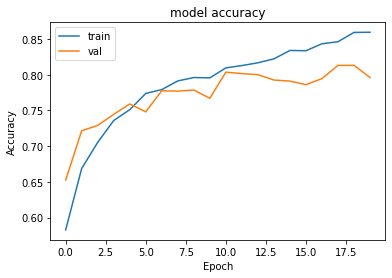

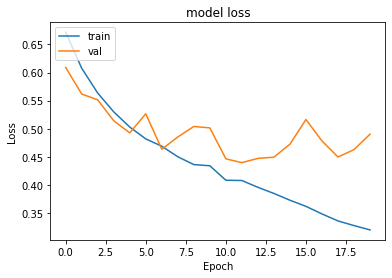

In [5]:
import matplotlib.pyplot as plt
# plot accuracy - epochs
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy"])
plt.legend(['train', 'val'], loc='upper left')
plt.show()
# plot loss - epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["loss","Validation Loss"])
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [87]:
score = cnn.evaluate_generator(test_set, 32)
print(score)

/var/folders/sd/hl_8_g39189b03rq7tsq0ty00000gn/T/ipykernel_36733/2892152589.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  score = cnn.evaluate_generator(test_set, 32)


[0.47808319330215454, 0.8095703125]


In [6]:
# save model
# cnn.save('cnn_model.h5')

## Part 4 - Making a single prediction

In [7]:
import numpy as np
from tensorflow.keras.utils import load_img, img_to_array
test_image = load_img('Data-CNN/single_prediction/cat_or_dog_2.jpg', target_size = (64, 64))
test_image = img_to_array(test_image)/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'
print(prediction)

2022-07-06 09:59:28.995467: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 772ms/step
cat
